In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [18]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [19]:
df['total score']=df['reading score']+df['writing score']+df['math score']
df['average score']=df['total score']/3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
X=df.drop(columns=['math score'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [21]:
Y=df['math score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [22]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transormer = OneHotEncoder()

preprocessor  = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transormer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)


In [ ]:
X=preprocessor.fit_transform(X)



[[ 1.          0.          0.         ...  0.39149181  0.34357423
   0.34357423]
 [ 1.          0.          0.         ...  1.31326868  1.0219275
   1.0219275 ]
 [ 1.          0.          0.         ...  1.64247471  1.74706375
   1.74706375]
 ...
 [ 1.          0.          0.         ... -0.20107904 -0.19443008
  -0.19443008]
 [ 1.          0.          0.         ...  0.58901542  0.46053169
   0.46053169]
 [ 1.          0.          0.         ...  1.18158627  1.06871048
   1.06871048]]


In [31]:
print(X)

[[ 1.          0.          0.         ...  0.39149181  0.34357423
   0.34357423]
 [ 1.          0.          0.         ...  1.31326868  1.0219275
   1.0219275 ]
 [ 1.          0.          0.         ...  1.64247471  1.74706375
   1.74706375]
 ...
 [ 1.          0.          0.         ... -0.20107904 -0.19443008
  -0.19443008]
 [ 1.          0.          0.         ...  0.58901542  0.46053169
   0.46053169]
 [ 1.          0.          0.         ...  1.18158627  1.06871048
   1.06871048]]


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
# Y_train.shape,
# Y_test.shape

((800, 21), (200, 21))

In [50]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2 =r2_score(true,predicted)
    return mae,rmse,r2

In [51]:
models= {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=   []
r2_list= []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train) #Training the model

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # Evaluating the model
    mae_train , rmse_train , r2_score_train = evaluate_model(Y_train,y_train_predict)
    mae_test , rmse_test , r2_score_test    = evaluate_model(Y_test,y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_score_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_score_test))
    r2_list.append(r2_score_test)
    
    print('='*35)
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.7381
- Mean Absolute Error: 3.7439
- R2 Score: 0.9004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7171
- Mean Absolute Error: 3.7579
- R2 Score: 0.9086


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3396
- Mean Absolute Error: 0.2724
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3432
- Mean Absolute Error: 0.2684
- R2 Score: 0.9995


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.2791
- Mean Absolute Error: 3.3838
- R2 Score: 0.9188
-----------------------

In [52]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model List','R2 List']).sort_values(by=['R2 List'],ascending=False)

,Model List,R2 List
0,Linear Regression,1.000000
2,Ridge,0.999516
6,XGBRegressor,0.977101
7,CatBoosting Regressor,0.968100
5,Random Forest Regressor,0.962164
4,Decision Tree,0.937515
8,AdaBoost Regressor,0.926101
1,Lasso,0.908560
3,K-Neighbors Regressor,0.889781


In [53]:
lin_model=LinearRegression()
lin_model=lin_model.fit(X_train,Y_train)
# Y_train_predict = lin_model.predict(X_train)
Y_test_predict = lin_model.predict(X_test)
score=r2_score(Y_test,Y_test_predict)
print("Accuraccy ==>",score*100);

Accuraccy ==> 100.0


Text(0, 0.5, 'Predicted')

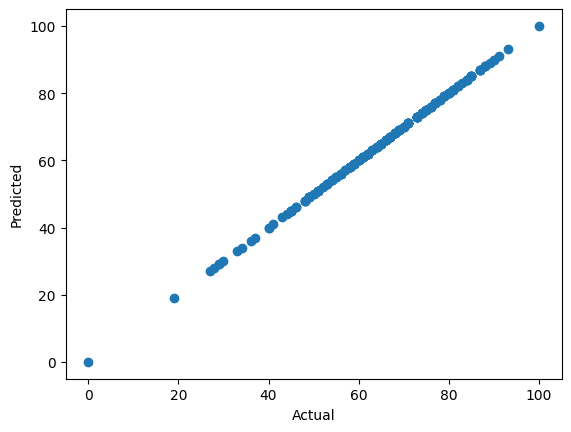

In [54]:
plt.scatter(Y_test,Y_test_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")

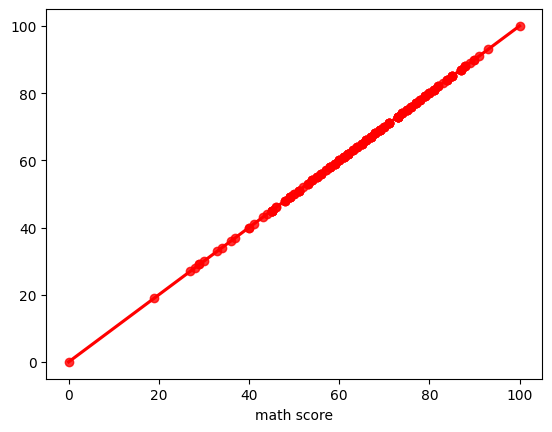

In [55]:
sns.regplot(x=Y_test,y=Y_test_predict,ci=None,color ='red');

In [56]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_test_predict,'Difference':Y_test-Y_test_predict})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-2.415845e-13
737,53,53.0,6.394885e-14
740,80,80.0,-7.105427e-14
660,74,74.0,-7.105427e-14
411,84,84.0,-1.705303e-13
...,...,...,...
408,52,52.0,1.847411e-13
332,62,62.0,1.350031e-13
208,74,74.0,-9.947598e-14
613,65,65.0,-8.526513e-14
